In [67]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

In [68]:
# constants
hbar = 1
omega = 1
mass = 1
lamb = 10

# operators
N = 20
adag = qt.create(N)
a = qt.destroy(N)
sigz = qt.sigmaz()
sigx = qt.sigmax()

# x and p ops in creation and annihilation basis
x_op = (a + adag) * np.sqrt(hbar / 2 / mass / omega)
p_op = 1j * (adag - a) * np.sqrt(mass * omega * hbar / 2)

# create hamiltonian
kineticTerm = p_op**2 / 2 / mass
potentialTerm = 0.5 * mass * omega**2 * x_op**2
perturbationTerm = lamb / 24 * x_op**4
H0 = kineticTerm + potentialTerm + perturbationTerm

# diagonalize
eigenvalues, eigenstates = H0.eigenstates()

# driving operator
def drive(t, V0, wd):
    return V0 * np.cos(wd * t)

# initial state
tlist = np.linspace(0, 200, 500)
wd = eigenvalues[1] - eigenvalues[0] # implicitly (eigenvalues[1] - eigenvalues[0]) / hbar but hbar = 1\
x01 = (eigenstates[0].dag() * x_op * eigenstates[1])
print(wd)

# create qubit ham
Hq = -wd / 2 * sigz

1.5621840459344107


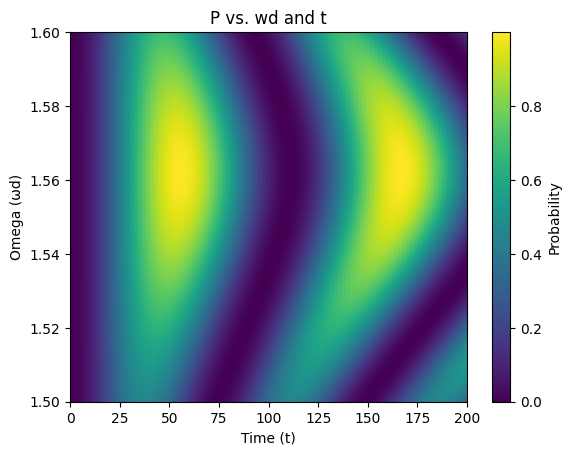

In [72]:
# problem 5 part b and c
V0 = 0.1
wlist = np.linspace(1.5, 1.6, 250)
probabilties = {}
tempProb = []

for w in wlist:
    args = {"V0": V0, "wd": w}
    
    # time evolve
    H = [Hq, [x01*sigx, drive]]
    psi_t = qt.sesolve(H, qt.basis(2,0), tlist, args=args)
    tempProb = []

    for states in psi_t.states:

        prob = np.abs(qt.basis(2,1).dag() * states)**2
        tempProb.append(prob)

    probabilties[w] = tempProb

plt.imshow(probabilties.values(),
           extent=[tlist.min(), tlist.max(), wlist.min(), wlist.max()],
           origin='lower',
           aspect='auto',
           cmap='viridis')
plt.colorbar(label="Probability")
plt.xlabel("Time (t)")
plt.ylabel("Omega (ωd)")
plt.title("P vs. wd and t")
plt.show()

In [73]:
# problem 5 part d
wc_potential = {}

for omega in wlist:
    wc_potential[omega] = max(probabilties[omega])

best_omega = max(wc_potential, key=wc_potential.get)
wc_omega_pair = {float(best_omega): wc_potential[best_omega]}

print(wc_omega_pair)

{1.561847389558233: np.float64(0.9999516864016825)}


$\textbf{(e) Explain the conditions on the drive frequency and drive strength required to achieve full population transfer.}$

The drive frequency must be in resonance with the transition frequency and be equal to the the difference between the eigenenergies 1 and 0 (when hbar = 1). The drive strength must also be low enough so we do not escape the computational basis however in this case I projected the hamiltonian so this is just a two level system.

$\textbf{(f) What factors determine how strongly the qubit is driven?}$

The amplitude (V0) of the drive determines the drive strength but so does the matrix element of the driving operator, x01, which is determined by $\bra{0} \hat{x} \ket{1}$.